# Supermarket analysis


As part of this project, my primary goal is to analyze supermarket sales data to uncover actionable insights that can improve business performance. Specifically, I want to understand which product lines drive the most revenue, how customer behavior differs between members and non-members, and identify trends in sales over time.

By diving deeper into the data, I'll be able to identify peak sales periods, assess the effectiveness of various payment methods, and explore the performance of different store branches. Additionally, I aim to provide recommendations on optimizing inventory levels and running more targeted promotions based on customer purchasing patterns.

Ultimately, this analysis will help the supermarket make data-driven decisions to increase sales, enhance customer satisfaction, and streamline operations.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("SuperMarket analysis.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


For the analysis we are doing, the key columns are:

- `Date`: To analyze sales trends over time.
- `Sales`: Total sales amount, including tax, to measure revenue.
- `Product Line`: To analyze sales by product category.
- `Branch`: To compare performance across different store branches.
- `Customer Type`: To explore the difference in spending between members and non-members.
- `Payment`: To analyze the distribution of sales by payment method.
- `Quantity`: To understand the volume of products sold.
  
These columns are essential for understanding sales patterns, customer behavior, and branch performance.

# Cleaning the Data/converting date time

In [13]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop rows with missing data
data = df.dropna()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Exploratory Data Analysis

## Sales Trends

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for nicer plots
sns.set(style="whitegrid")

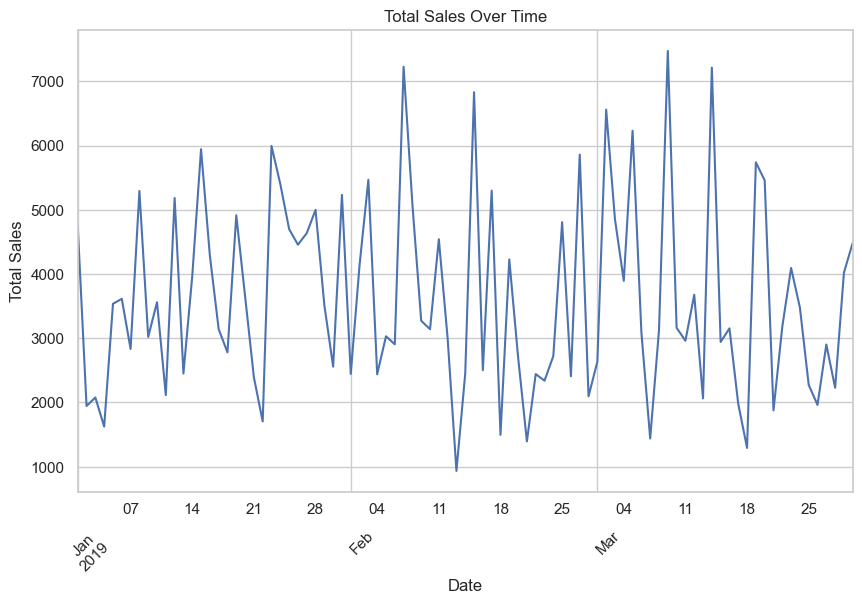

In [45]:
# Assuming 'Date' is already converted to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date to get total sales for each day
sales_by_date = df.groupby('Date')['Sales'].sum()

# Plot total sales over time
plt.figure(figsize=(10, 6))
sales_by_date.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

From my analysis of the sales data by date, I observed some clear trends in how sales fluctuate over time.In terms of overall monthly patterns, there are some spikes around certain periods that could correspond to holidays or promotions, although I'd need more context to confirm if there were any sales events or special campaigns during these times. The data also suggests that certain times of the month, such as the end, might see increased sales, possibly due to customers receiving paychecks and making larger purchases.

These trends give me a better understanding of when sales are highest, allowing me to suggest strategies like stocking up more on high-demand days or running promotions to boost sales during quieter periods.

## Top Selling Product Categories

In [47]:
df.groupby('Product line')['Sales'].sum().sort_values(ascending=False).head(3)

Product line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Name: Sales, dtype: float64

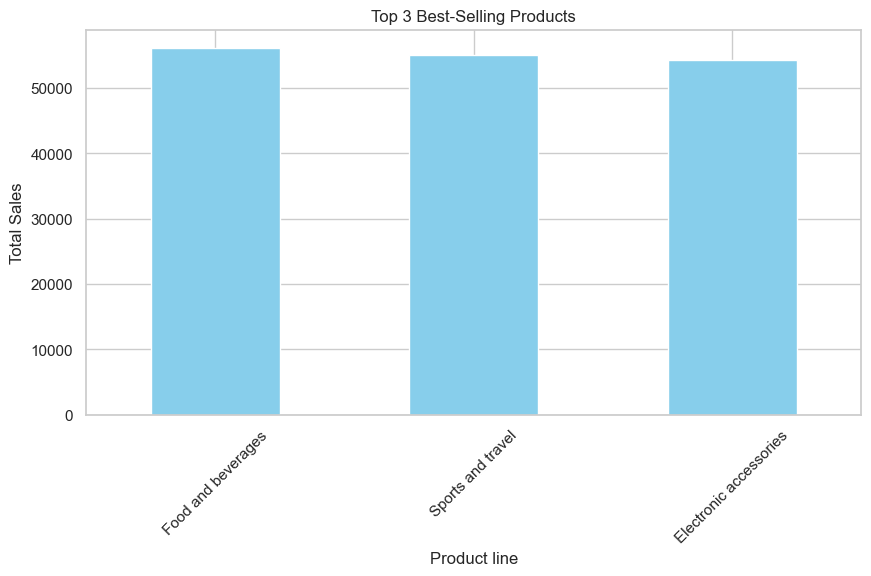

In [49]:
# Group by 'Product' and sum sales
top_products = df.groupby('Product line')['Sales'].sum().sort_values(ascending=False).head(3)

# Plot the top 3 products
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 3 Best-Selling Products')
plt.xlabel('Product line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

The `Food and Beverages` category generates the highest sales, followed closely by `Sports and Travel` and `Electronic Accessories`.

## Customer Patterns

### Sales by Gender

In [28]:
# Group by 'Gender' and sum sales
df.groupby('Gender')['Sales'].sum().sort_values().head()

Gender
Male      128294.9115
Female    194671.8375
Name: Sales, dtype: float64

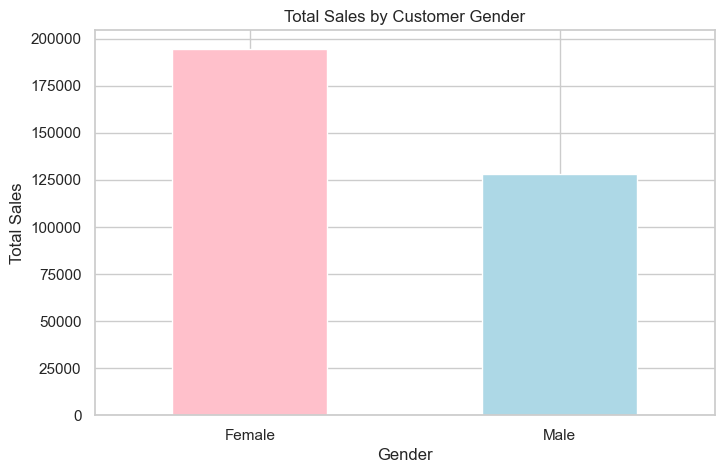

In [51]:
# Group by 'Gender' and sum sales
sales_by_gender = df.groupby('Gender')['Sales'].sum()

# Plot sales by gender
plt.figure(figsize=(8, 5))
sales_by_gender.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Total Sales by Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

I noticed that female customers tend to account for a higher percentage of total sales compared to male customers. This could indicate that women are more frequent shoppers or that they tend to make larger purchases during their visits.

### Sales by Day of Week

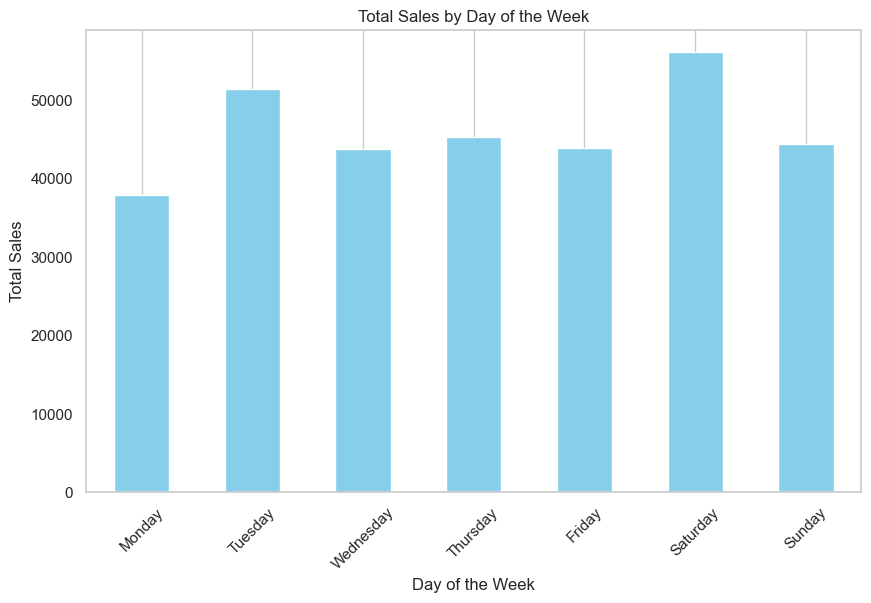

In [55]:
# Step 1: Convert 'Date' column to datetime format if not done yet
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Step 2: Extract the day of the week and create a new column
df['DayOfWeek'] = df['Date'].dt.day_name()

# Step 3: Set the order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=day_order, ordered=True)

# Step 4: Group by DayOfWeek and sum the sales
sales_by_day = df.groupby('DayOfWeek')['Sales'].sum()

# Step 5: Plotting the results
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

I found that sales tend to peak on Saturdays. This is likely because customers are preparing for the weekend, making larger purchases, or shopping for social events and family gatherings. In contrast, Mondays typically show the lowest sales figures, suggesting that people are less inclined to shop at the beginning of the week, possibly due to budget constraints after weekend spending. During the middle of the week, specifically on Wednesdays, Thursdays, and Fridays, I noticed that sales stabilize at moderate levels. 

# Conclusions and Recommendations

Based on thise analysis I have several suggestions to improve sales:
- Targeted Marketing Campaigns: Develop gender-specific marketing strategies that highlight products favored by each gender. For instance, promotions focused on Health and Beauty items can be directed at female shoppers, while marketing efforts for Electronics and Sports products can cater to male customers. Additionally, consider creating tailored promotions for specific product lines based on their sales performance throughout the week.

- Promotions for Slow Days: Introduce targeted promotions during the slower weekdays (Mondays) to boost sales during these periods. Implementing "Midweek Specials" or discounts could encourage more foot traffic and increase overall sales. These promotions could focus on high-demand categories identified in the analysis, such as offering discounts on Beverages or Snacks.

- Enhance Weekend Promotions: Given the high sales volumes on Saturdays, consider implementing additional promotions or loyalty programs specifically for these days. Creating events or special discounts on popular items could further drive sales during peak shopping times. For example, hosting weekend sales events or bundling popular products could entice customers to make larger purchases.

- Inventory Management Adjustments: Utilize insights from sales trends to optimize inventory levels for each day of the week. Increasing stock for popular items leading up to the weekend while maintaining moderate levels during weekdays will help ensure availability without overstocking. This can help reduce waste and improve profitability.

- Customer Engagement Initiatives: Consider introducing loyalty programs or membership discounts that incentivize customers to shop more frequently, particularly on weekdays. Offering points or rewards for purchases could encourage customers to visit the store during off-peak times and explore different product categories.

- Seasonal Promotions: Leverage seasonal trends and holidays to create tailored marketing campaigns that align with customer purchasing behavior. For example, offering promotions on seasonal items or holiday-related products during peak shopping periods can capture customer interest and drive sales.

In conclusion, the insights gained from the sales data analysis provide a solid foundation for strategic improvements in marketing, inventory management, and customer engagement. By implementing these recommendations, the supermarket can better align its operations with customer behavior, ultimately leading to enhanced sales performance and customer satisfaction. Adopting a data-driven approach will allow the supermarket to remain competitive in the marketplace and respond effectively to evolving consumer preferences.

<Axes: xlabel='Hour'>

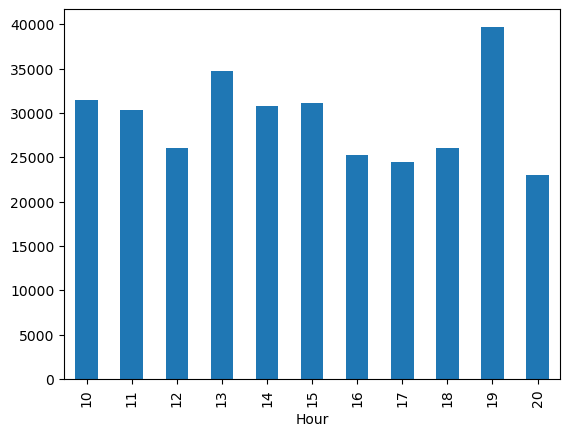

In [30]:
df.groupby('Hour')['Sales'].sum().plot(kind='bar')

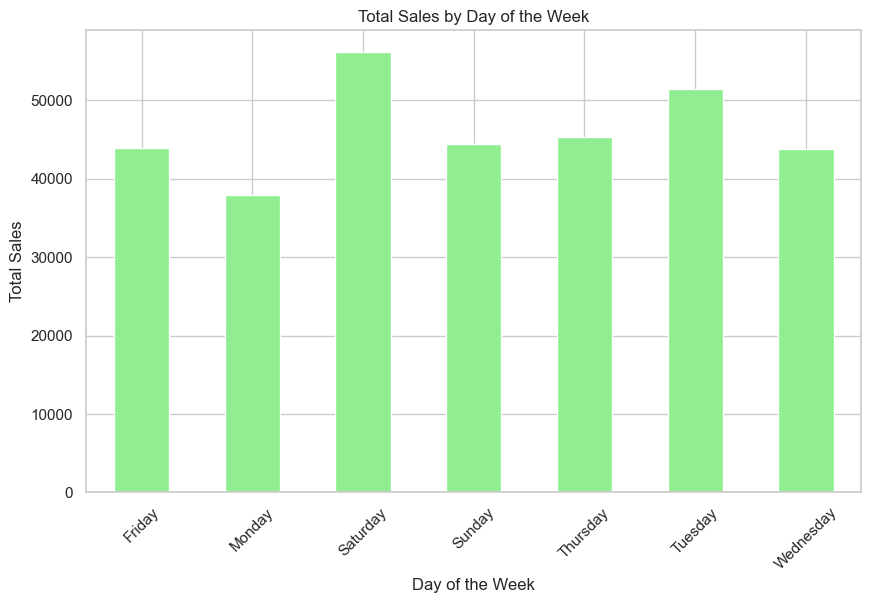

In [51]:
# Assuming you already have 'DayOfWeek' column
# If not, create it by extracting day names from the Date column
df['DayOfWeek'] = df['Date'].dt.day_name()

# Group by 'DayOfWeek' and sum sales
sales_by_day = df.groupby('DayOfWeek')['Sales'].sum()

# Plot sales by day of the week
plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
